In [1]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os
import json

In [ ]:
# if isinstance(image, torch.Tensor):
#   image = image.permute(1, 2, 0).cpu().numpy()

In [5]:
def thyrocytes_visualization(image, bboxes, labels):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image)
    for box, label in zip(bboxes, labels):
        # x_min, y_min, box_width, box_height = map(int, box)
        x_min, y_min, box_width, box_height = box
        rect = plt.Rectangle(
           ( x_min, y_min),
            box_width, box_height,
            linewidth=.5, edgecolor="blue", facecolor="none"
        )
        ax.add_patch(rect)
        ax.text(
            x_min, y_min - 5, label,
            color="blue", fontsize=2, weight="bold"
        )

Processing image: LS-269.jpg
[1204.0168302945297, 1228.2704067321172, 1283.7071528751746, 1356.4678821879377, 1347.805890603085, 1346.0734922861143, 1271.5803646563809, 1228.2704067321172, 1157.2420757363248, 1100.0729312762967, 1081.0165497896207, 1051.5657784011214, 1032.5093969144455, 997.8614305750345, 964.9458625525942, 944.1570827489477, 904.3119214586251, 876.5935483870963, 859.2695652173909, 835.0159887798033, 810.7624123422156, 791.7060308555396, 809.030014025245, 845.4103786816265, 897.3823281907429, 880.0583450210374, 840.2131837307148, 833.2835904628326, 815.9596072931272, 814.2272089761567, 807.2976157082745, 809.030014025245, 805.5652173913039, 798.6356241234217, 779.5792426367458, 757.0580645161286, 750.1284712482465, 741.4664796633938, 731.0720897615705, 713.748106591865, 696.4241234221596, 680.8325385694246, 677.3677419354835, 673.9029453015424, 658.3113604488075, 647.9169705469842, 628.8605890603083, 609.8042075736322, 590.7478260869563, 571.6914446002802, 563.0294530

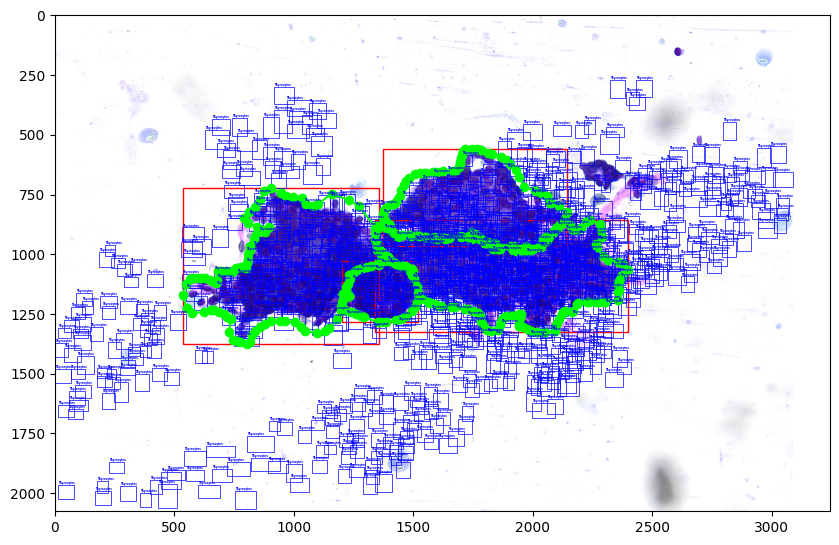

Processing image: LS-155.jpg
[1346.3209551014422, 1350.8445030396242, 1397.2108694059905, 1426.6139310041742, 1448.100783710539, 1444.7081227569024, 1487.6818281696321, 1525.0010986596344, 1557.7968212114545, 1621.1264923460037, 1624.5191532996403, 1591.7234307478202, 1557.7968212114545, 1621.1264923460037, 1677.6708415732796, 1681.0635025269162, 1618.8647183769126, 1600.7705266241842, 1575.891012964183, 1500.121584999633, 1449.2316706950846, 1414.1741741741735, 1393.818208452354, 1374.59312971508, 1332.750311286896, 1303.3472496887123, 1275.0750750750744, 1272.8133011059833, 1295.4310407968937, 1266.0279791987102, 1260.3735442759826, 1294.3001538123483, 1345.1900681168966, 1350.8445030396242, 1346.3209551014422]
[1438.5688127151534, 1438.5688127151534, 1473.6263092360646, 1461.1865524060638, 1405.7730901633333, 1368.453819673331, 1363.930271735149, 1317.5639053687828, 1316.4330183842371, 1311.9094704460551, 1257.62689518787, 1205.6060938987762, 1179.5956932542292, 1177.333919285138, 1

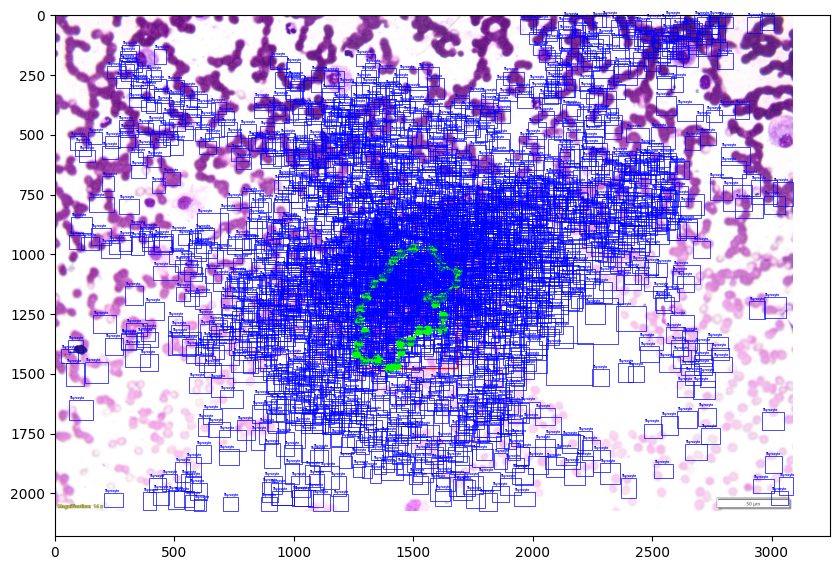

In [ ]:
dataset = os.walk('/home/Special_Problem/Data')
label_set = set()
for root, dirs, files in dataset:
    for file in files:
        if file.endswith('.jpg'):
            print(f"Processing image: {file}")
            try:
                image = Image.open(os.path.join(root, file)).convert("RGB")
                # Create figure
                fig, ax = plt.subplots(1, figsize=(10,10))
                ax.imshow(image)
                
                path = os.path.join(root + " - ANNOTATED FILES", file.replace('.jpg', 'A.csv'))
                json_path = os.path.join(root + " - ANNOTATED FILES", file.replace('.jpg', 'B.json'))
                
                with open(json_path, 'r') as f:
                    json_data = json.load(f)
                df = pd.read_csv(path)
                
                for item in json_data[file].values():
                    if isinstance(item, dict):
                        if item != {}:
                            length = len(item.values())
                            for i in range(length):
                                print(item[str(i)]['shape_attributes']['all_points_x'])
                                print(item[str(i)]['shape_attributes']['all_points_y'])
                                poly_x = item[str(i)]['shape_attributes']['all_points_x']
                                poly_y = item[str(i)]['shape_attributes']['all_points_y']
                                ax.plot(poly_x + [poly_x[0]], poly_y + [poly_y[0]], marker='o', color='lime')
                                # Compute bounding box (red)
                                x_min, x_max = min(poly_x), max(poly_x)
                                y_min, y_max = min(poly_y), max(poly_y)
                                rect = plt.Rectangle(
                                    (x_min, y_min),
                                    x_max - x_min, y_max - y_min, edgecolor="red", facecolor="none"
                                )
                                ax.add_patch(rect)
                labels = df['label_name'].tolist()  # Assuming single class for simplicity
                bboxes = df[['bbox_x','bbox_y','bbox_width','bbox_height']].apply(lambda x: [x['bbox_x'], x['bbox_y'], x['bbox_width'], x['bbox_height']], axis=1).tolist()
                for box, label in zip(bboxes, labels):
                    # x_min, y_min, box_width, box_height = map(int, box)
                    x_min, y_min, box_width, box_height = box
                    rect = plt.Rectangle(
                    ( x_min, y_min),
                        box_width, box_height,
                        linewidth=.5, edgecolor="blue", facecolor="none"
                    )
                    ax.add_patch(rect)
                    ax.text(
                        x_min, y_min - 5, label,
                        color="blue", fontsize=2, weight="bold"
                    )
                plt.show()
            except FileNotFoundError:
                print(f"File not found: {os.path.join(root + ' - ANNOTATED FILES', file.replace('.jpg', 'A.csv'))}")
            break
        break

In [4]:
transform = A.Compose(
    [
        # Geometric Transformations
        A.OneOf([
            A.HorizontalFlip(p=1),
            A.VerticalFlip(p=1),
            A.RandomRotate90(p=1),
        ], p=1),
        # Photometric Transformations
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.5),
        A.GaussNoise(std_range=(0.1, 0.2), p=1.0),
        A.CoarseDropout(
        num_holes_range=(3, 3),
        hole_height_range=(3, 3),
        hole_width_range=(3, 3),
        fill="random_uniform",
        p=0.5),
        # A.GridDropout(ratio=0.5, p=0.5)
        # ToTensorV2()
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['labels'])
)

In [ ]:
def save(augmented_image, augmented_bboxes, augmented_labels, file):
    # aug_np = augmented_image.permute(1, 2, 0).cpu().numpy()
    Image.fromarray(augmented_image).save("augmented_" + file)

    # Save annotations
    aug_df = pd.DataFrame(augmented_bboxes, columns=["bbox_x", "bbox_y", "bbox_width", "bbox_height"])
    aug_df["label_name"] = augmented_labels
    csv_name = file.replace('.jpg', 'A.csv')
    aug_df.to_csv("augmented_" + csv_name, index=False)

In [ ]:
for root, dirs, files in dataset:
    for file in files:
        if file.endswith('.jpg'):
            image = Image.open(os.path.join(root, file)).convert("RGB")
            df = pd.read_csv(os.path.join(root.replace('BATCH 1', 'BATCH 1 - ANNOTATED FILES'), file.replace('.jpg', 'A.csv')))
            labels = df['label_name'].tolist()  # Assuming single class for simplicity
            bbox = df[['bbox_x','bbox_y','bbox_width','bbox_height']].apply(lambda x: [x['bbox_x'], x['bbox_y'], x['bbox_width'], x['bbox_height']], axis=1).tolist()
            print(file)
            augmented = transform(image=np.array(image), bboxes=bbox, labels=labels)
            augmented_image = augmented['image']
            augmented_bboxes = augmented['bboxes']
            augmented_labels = augmented['labels']
            visualize(augmented_image, augmented_bboxes, augmented_labels, file)
            save(augmented_image, augmented_bboxes, augmented_labels, file)
            break

In [ ]:
label_map = {
    "Cluster": 0,
    "Thyrocytes": 1,
    "Thyrocyte": 1
}

for root, dirs, files in dataset:
    for file in files:
        if file.endswith('.jpg'):
            basename = file.split('.')[0]
            # Open image
            image = Image.open(os.path.join(root, file)).convert("RGB")
            # Load corresponding CSV
            csv_path = os.path.join(
                root.replace('BATCH 1', 'BATCH 1 - ANNOTATED FILES'), 
                basename + 'A.csv'
            )
            df = pd.read_csv(csv_path)
            # Save YOLO annotation
            with open(f"Data/labels/{basename}.txt", "w") as f:
                for _, row in df.iterrows():
                    class_id = label_map[row['label_name']]
                    x_min = row['bbox_x']
                    y_min = row['bbox_y']
                    w = row['bbox_width']
                    h = row['bbox_height']

                    # Use CSV dimensions if available, else use image size
                    width = row["image_width"] if "image_width" in df.columns else img_w
                    height = row["image_height"] if "image_height" in df.columns else img_h

                    x_center = (x_min + w / 2) / width
                    y_center = (y_min + h / 2) / height
                    w_norm = w / width
                    h_norm = h / height

                    f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")